In [2]:
"""
Tom希望写一个python程序来记录他每天掌握的英文单词的情况，使用合适的数据结构设计辅助程序，可以实现如下两个需求：
1. 能够记录新学的英文单词，和相应的中文翻译；
2. 可以根据英文查找对应的中文；
"""

Eng_dict = dict() # 新建一个字典存储单词

# 添加新单词
def add_word(word:str, meaning: str):
    assert len(word)>0, 'the length of word should be greater than 0'
    assert len(meaning)>0, 'the length of meaning should be greater than 0'
    
    if word not in Eng_dict.keys(): # 现有字典的keys没有记录，则添加
        Eng_dict[word]=meaning
        print('the new word has been added into dictionary')
    else:
        print('the word has been recorded')
        
# 查找
def search(word:str):
    assert len(word)>0, 'the length of word should be greater than 0'
    if word in Eng_dict.keys():
        print('the meaning of {} is {}'.format(word, Eng_dict[word]))
    else:
        print('the word is not be recorded')
        
# 测试
def test():
    add_word('chip', '芯片')
    add_word('memory', '内存')
    
    search('gpu')
    search('chip')
    search('memory')
    
test()

the new word has been added into dictionary
the new word has been added into dictionary
the word is not be recorded
the meaning of chip is 芯片
the meaning of memory is 内存


In [3]:
"""
一个球从100米的高空落下，每次落地反弹的高度为原来高度的一半，然后再落下，再弹起…，求该球在第十次落地的时候，
一共经过了多少米？第十次反弹的高度是多少？设计相关程序求解（推荐使用递归结构）
"""

def height(n):
    assert n>=0, 'Error value for parameter'
    if n==0: return 100 # 初始高度
    else: return 1/2*height(n-1)

def work():
    height_sum =100
    for i in range(1, 11):
        print('The height of {}th bounce is {:.2f}'.format(i, height(i)))
        height_sum += 2*height(i) # 计算总路程
    print('The total height is {:.4f}'.format(height_sum))
    
work()


The height of 1th bounce is 50.00
The height of 2th bounce is 25.00
The height of 3th bounce is 12.50
The height of 4th bounce is 6.25
The height of 5th bounce is 3.12
The height of 6th bounce is 1.56
The height of 7th bounce is 0.78
The height of 8th bounce is 0.39
The height of 9th bounce is 0.20
The height of 10th bounce is 0.10
The total height is 299.8047


1.9801980198019795


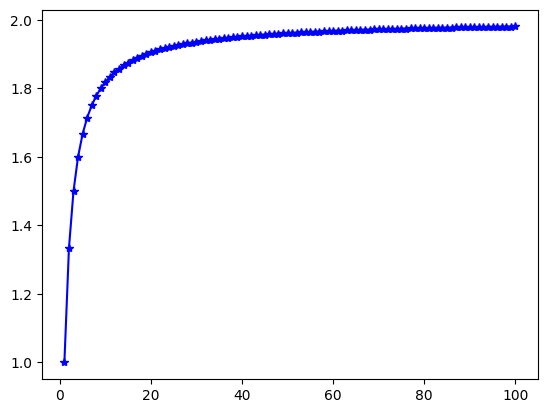

In [6]:
"""
输入整数N，计算如下方程的值：
𝑆(𝑁)=1+1/(1+2)+1/(1+2+3)+…+1/(1+2+3+…+𝑁)

并绘制出N和S(N)的关系曲线
"""
import matplotlib.pyplot as plt

def func(n):
    tot=0
    for i in range(1, n+1):
        tmp = 0
        for j in range(1, 1+i):
            tmp+=j
        tot+=1.0/tmp
    return tot
        
print(func(100))

Ns = list(range(1, 101))
Vs = []

for i in Ns:
    Vs.append(func(i))
    
plt.plot(Ns, Vs, 'b-*')
plt.show()

计算向量$a$和$b$的距离，其中$a=(5, 3)^T, b=(1, 4)^T$

In [2]:
# 计算两个向量的欧式距离
import numpy as np

a = np.array([5, 3])
b = np.array([1, 4])

def dist(va, vb):
    d = va - vb
    return np.sqrt(d@d)

print('distance is {:.4f}'.format(dist(a, b)))
print('distance is {:.4f}'.format(np.linalg.norm(a-b)))

distance is 4.1231
distance is 4.1231


In [6]:
# 计算a方向上的单位向量
z = np.array([0, 0])
def dir(va):
    return va / dist(va, z)

print('direction is ', dir(a))

direction is  [0.85749293 0.51449576]


In [12]:
# 计算a和b之间的角度余弦值
def f_cos(va, vb):
    return va@vb / (dist(va, z)*dist(vb, z))

print('cosine is ', (f_cos(a, b)))
print('theta is ', np.arccos(f_cos(a, b)))
print('theta is ', np.pi / 4)

cosine is  0.7071067811865475
theta is  0.7853981633974484
theta is  0.7853981633974483


In [22]:
# 计算a和b之间的Lp范数
def norm_p(va, vb, p):
    v = va - vb
    s = 0
    for _v in v:
        s+=np.power(np.abs(_v), p)
    return np.power(s, 1/p)

print('norm 3 is {:.4f}'.format(norm_p(a, b, 3)))
print('norm 3 is {:.4f}'.format(np.linalg.norm(a-b, ord=3)))

norm 3 is 4.0207
norm 3 is 4.0207


样本均值和协方差计算，样本均值向量为$\mu=(5.834, 3.054)^T$, 样本协方差为
$$
\hat{\Sigma}=\begin{pmatrix}
0.681 & -0.039 \\
-0.039 & 0.187
\end{pmatrix}
$$
特征1的方差是$\hat{\sigma}_1^2=0.681$，特征2的方差是$\hat{\sigma}_2^2=0.187$, 两个特征的协方差是$\hat{\sigma}_{12}=-0.039$.

In [5]:
# 计算特征相关系数
# 均值向量
mu = np.array([5.834, 3.054]) 
# 方差-协方差矩阵
Sig = np.array([
    [0.681, -0.039],
    [-0.039, 0.187]
])

rho = Sig[0, 1] / np.sqrt(Sig[0, 0] * Sig[1, 1])
rho

-0.1092874387009562

In [10]:
# 计算特征之间的夹角
# 用角度表示
_theta = np.arccos(rho)*180/np.pi # 弧度转角度
_theta # 夹角为96度，接近正交的状态，说明两个属性几乎无关

96.27424117389855

In [12]:
# 计算样本的方差总和
np.trace(Sig)

0.8680000000000001

In [13]:
# 计算广义方差
np.linalg.det(Sig)

0.12582600000000002

### 使用内积和外积计算样本协方差矩阵
考虑如下二维数据集：
$$
D=\begin{pmatrix}
1 & 0.8\\
5 & 2.4\\
9 & 5.5
\end{pmatrix}
$$
均值向量 $\hat{\mu}=((1+5+9)/3, (0.8+2.4+5.5)/3)^T=(5, 2.9)^T$

In [27]:
# 计算居中数据矩阵
D = np.array([
    [1, 0.8],
    [5, 2.4],
    [9, 5.5]
])

mu = np.array([5, 2.9]).T
# 用np.ones构造一个3*1的全1矩阵
Z = D-np.ones(3).reshape(-1, 1)*mu.T
Z

array([[-4. , -2.1],
       [ 0. , -0.5],
       [ 4. ,  2.6]])

In [28]:
n = 3 # 样本数量为3
## 使用内积法计算协方差矩阵
S = 1/n * Z.T@Z
S

array([[10.66666667,  6.26666667],
       [ 6.26666667,  3.80666667]])

In [42]:
## 使用外积法计算协方差矩阵
def S_outer_product(Z):
    s = np.zeros([2, 2])
    for i in range(Z.shape[0]):
        s+=np.outer(Z[i,], Z[i,])
        
    return s/3

S2=S_outer_product(Z)
S2

array([[10.66666667,  6.26666667],
       [ 6.26666667,  3.80666667]])

In [49]:
## 使用内置函数
np.cov(D.T, bias=True) # 有偏协方差矩阵

array([[10.66666667,  6.26666667],
       [ 6.26666667,  3.80666667]])

In [50]:
np.cov(D.T, bias=False) # 五篇协方差矩阵

array([[16.  ,  9.4 ],
       [ 9.4 ,  5.71]])

In [52]:
# 在无偏计算方式中，总体数为n-1，使用手动计算如下
def S_outer_product(Z):
    n = Z.shape[0]
    s = np.zeros([2, 2])
    for i in range(Z.shape[0]):
        s+=np.outer(Z[i,], Z[i,])
        
    return s/(n-1)

S_outer_product(Z)

array([[16.  ,  9.4 ],
       [ 9.4 ,  5.71]])

### 正态分布概率密度图像绘制

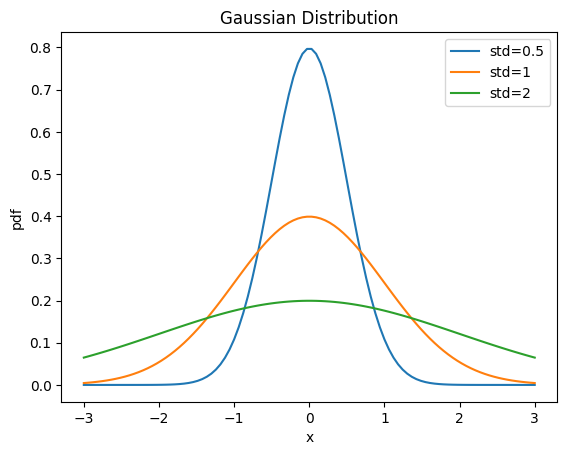

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

std_list = [0.5, 1, 2]
n = 100 # 100个样本点

for std in std_list:
    x = np.linspace(-3, 3, n)
    y = 1/(np.sqrt(2*np.pi)*std) * np.exp(-(x**2)/(2*std**2))
    
    plt.plot(x, y, label=f'std={std}')
    
plt.title('Gaussian Distribution')
plt.ylabel('pdf')
plt.xlabel('x')
plt.legend()

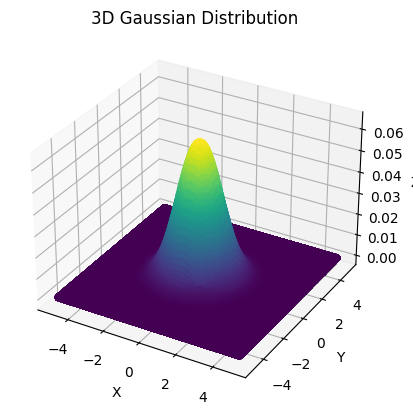

In [15]:
from mpl_toolkits.mplot3d import Axes3D

mean = [0, 0, 0]
covariance = [[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]]

# make grid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
z = np.linspace(-5, 5, 100)
X, Y, Z = np.meshgrid(x, y, z)
pos = np.empty(X.shape + (3,))
pos[:, :, :, 0] = X
pos[:, :, :, 1] = Y
pos[:, :, :, 2] = Z

# pdf
rv = np.exp(-0.5 * np.sum((pos - mean) @ np.linalg.inv(covariance) * (pos - mean), axis=-1)) / np.sqrt((2 * np.pi) ** 3 * np.linalg.det(covariance))

# Plot 3D Gaussian distribution
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, rv, c=rv, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Gaussian Distribution')
plt.show()
